In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

%matplotlib inline

In [2]:
data_train = pd.read_csv('C:/Users/sriji/MachineLearning/DemoDatasets/Lesson 4/bigmart_train.csv')

In [3]:
data_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
data_train.shape

(8523, 12)

In [5]:
data_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
data_train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [8]:
data_train['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [9]:
data_train['Outlet_Age']= 2020 - data_train['Outlet_Establishment_Year']

In [10]:
data_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,21
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,11
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,21
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,22
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,33


In [11]:
data_train['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [12]:
data_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Age
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914,22.168133
std,4.643456,0.051598,62.275067,8.371760,1706.499616,8.371760
min,4.555000,0.000000,31.290000,1985.000000,33.290000,11.000000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400,16.000000
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000,21.000000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400,33.000000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,35.000000


In [13]:
data_train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [14]:
data_train['Outlet_Size'].mode()

0    Medium
dtype: object

In [15]:
data_train['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [16]:
# replacing the missing values in outlet size with mode
# since it is categorical variable, replacing with mode

data_train['Outlet_Size'] = data_train['Outlet_Size'].fillna(data_train['Outlet_Size'].mode()[0])

In [17]:
data_train['Outlet_Size'].isna().sum()

0

In [18]:
data_train['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [19]:
# replacing the missing values in item_weight with mean
# since it is a continuos numerical variable, replacing it with mean

data_train['Item_Weight'].unique()

array([ 9.3  ,  5.92 , 17.5  , 19.2  ,  8.93 , 10.395, 13.65 ,    nan,
       16.2  , 11.8  , 18.5  , 15.1  , 17.6  , 16.35 ,  9.   , 13.35 ,
       18.85 , 14.6  , 13.85 , 13.   ,  7.645, 11.65 ,  5.925, 19.25 ,
       18.6  , 18.7  , 17.85 , 10.   ,  8.85 ,  9.8  , 13.6  , 21.35 ,
       12.15 ,  6.42 , 19.6  , 15.85 ,  7.39 , 10.195,  9.895, 10.895,
        7.905,  9.195,  8.365,  7.97 , 17.7  , 19.35 ,  8.645, 15.6  ,
       18.25 ,  7.855,  7.825,  8.39 , 12.85 , 19.   ,  5.905,  7.76 ,
       16.75 , 15.5  ,  6.055,  6.305, 20.85 , 20.75 ,  8.895, 19.7  ,
        8.75 , 13.3  ,  8.31 , 19.75 , 17.1  , 10.5  ,  6.635, 14.15 ,
        8.89 ,  9.1  ,  7.5  , 16.85 ,  7.485, 11.6  , 12.65 , 20.25 ,
        8.6  , 12.6  ,  8.88 , 20.5  , 13.5  ,  7.235,  6.92 ,  8.02 ,
       12.8  , 16.6  , 14.   , 16.   , 21.25 ,  7.365, 18.35 ,  5.465,
        7.27 ,  6.155, 19.5  , 15.2  , 14.5  , 13.1  , 12.3  , 11.1  ,
       11.3  ,  5.75 , 11.35 ,  6.525, 10.3  ,  5.78 , 11.85 , 18.75 ,
      

In [20]:
data_train['Item_Weight'].mean()

12.857645184136183

In [21]:
data_train['Item_Weight'] = data_train['Item_Weight'].fillna(data_train['Item_Weight'].mean())

In [22]:
data_train['Item_Weight'].isna().sum()

0

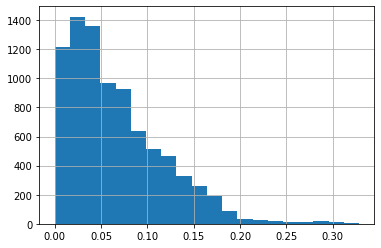

In [23]:
data_train['Item_Visibility'].hist(bins=20)

A data point is an outlier if it is 1.5 IQR above the third quartile or below the 1st quartile

We need to remove the outliers

In [24]:
Q1 = data_train['Item_Visibility'].quantile(0.25)
Q3 = data_train['Item_Visibility'].quantile(0.75)

IQR = Q3 - Q1

filt_data = data_train.query('(@Q1 - 1.5 * @IQR) <= Item_Visibility <= (@Q3 + 1.5 * @IQR)')

In [25]:
filt_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,21
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,11
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,21
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,22
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,33
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,18
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,16
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,11


In [26]:
filt_data.shape, data_train.shape

((8379, 13), (8523, 13))

 Outliers are removed. Evident from the count

In [27]:
data_train = filt_data

data_train.shape

(8379, 13)

In [28]:
# converting the numerical values of ITEM_VISIBILITY to categorical values

data_train['Item_Visibility_Bins'] = pd.cut(data_train['Item_Visibility'],                                  \
                                            [0.000,0.065,0.13,0.2],                                            \
                                            labels=['Low Viz','Viz','High Viz'])

In [29]:
data_train['Item_Visibility_Bins'].value_counts()

Low Viz     4403
Viz         2557
High Viz     893
Name: Item_Visibility_Bins, dtype: int64

In [30]:
 data_train['Item_Visibility_Bins'].isna().sum()

526

In [31]:
data_train['Item_Visibility_Bins'] = data_train['Item_Visibility_Bins'].replace(np.nan,'Low Viz', regex=True)

In [32]:
data_train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [33]:
data_train['Item_Fat_Content'] = data_train['Item_Fat_Content'].replace(['Low fat','LF','low fat',],'Low Fat')

In [34]:
data_train['Item_Fat_Content'] = data_train['Item_Fat_Content'].replace(['Regular','reg'],'Regular')

In [35]:
data_train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

# LABEL ENCODER 

to convert the categorical data into numerical equivalent to build model

ML models can be built only using numerical values

In [36]:
le = LabelEncoder()

Label encoding 'Item_Fat_Content'

In [37]:
data_train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [38]:
data_train['Item_Fat_Content'] = le.fit_transform(data_train['Item_Fat_Content'])

----

Label encoding 'Item_Visibility_Bins'

In [39]:
data_train['Item_Visibility_Bins'] = le.fit_transform(data_train['Item_Visibility_Bins'])

-----

Label encoding 'Outlet size'

In [40]:
data_train['Outlet_Size'] = le.fit_transform(data_train['Outlet_Size'])

------

Label encoding 'Outlet_Location_type'

In [41]:
data_train['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [42]:
data_train['Outlet_Location_Type'] = le.fit_transform(data_train['Outlet_Location_Type'])

----

Creating dummies for Outlet_Type

In [43]:
data_train['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [44]:
data_train['Outlet_Type']

0       Supermarket Type1
1       Supermarket Type2
2       Supermarket Type1
3           Grocery Store
4       Supermarket Type1
              ...        
8518    Supermarket Type1
8519    Supermarket Type1
8520    Supermarket Type1
8521    Supermarket Type2
8522    Supermarket Type1
Name: Outlet_Type, Length: 8379, dtype: object

 Why are we creating dummies only for Outlet Type and not for ITEM_FAT_CONTENT, OUTLET_LOCATION_TYPE, OUTLET_SIZE, 
ITEM_VISIBILITY BINS?

Answer:
    All those variables can take only one value/type
    
    but Outlet type can be multiple value/type
    
    so we create dummies -> a truth table kind of arrangement with values 0 and 1

In [45]:
dummy = pd.get_dummies(data_train['Outlet_Type'])
dummy.head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [46]:
data_train = pd.concat([data_train,dummy],axis=1)

In [47]:
data_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Outlet_Age',
       'Item_Visibility_Bins', 'Grocery Store', 'Supermarket Type1',
       'Supermarket Type2', 'Supermarket Type3'],
      dtype='object')

In [48]:
data_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                   object
Item_Outlet_Sales            float64
Outlet_Age                     int64
Item_Visibility_Bins           int32
Grocery Store                  uint8
Supermarket Type1              uint8
Supermarket Type2              uint8
Supermarket Type3              uint8
dtype: object

We will use only the relevant columns for model building

We will drop the unnecessary columns

In [49]:
data_train['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [50]:
data_train = data_train.drop(['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Type', \
                              'Outlet_Establishment_Year'],axis=1)

In [51]:
data_train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Size', 'Outlet_Location_Type', 'Item_Outlet_Sales',
       'Outlet_Age', 'Item_Visibility_Bins', 'Grocery Store',
       'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'],
      dtype='object')

In [52]:
data_train.isna().sum()

Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_MRP                0
Outlet_Size             0
Outlet_Location_Type    0
Item_Outlet_Sales       0
Outlet_Age              0
Item_Visibility_Bins    0
Grocery Store           0
Supermarket Type1       0
Supermarket Type2       0
Supermarket Type3       0
dtype: int64

---

# BUILDING A MODEL

In [53]:
X = data_train.drop(['Item_Outlet_Sales'],axis=1)

In [54]:
X.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Age',
       'Item_Visibility_Bins', 'Grocery Store', 'Supermarket Type1',
       'Supermarket Type2', 'Supermarket Type3'],
      dtype='object')

In [55]:
y = data_train.Item_Outlet_Sales

In [56]:
y.shape

(8379,)

In [57]:
data_test = pd.read_csv('C:/Users/sriji/MachineLearning/DemoDatasets/Lesson 4/bigmart_test.csv')

In [58]:
data_test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [59]:
data_test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [60]:
data_test['Outlet_Age']= 2020 - data_test['Outlet_Establishment_Year']

In [61]:
data_test['Outlet_Size'] = data_test['Outlet_Size'].fillna('Medium')

In [62]:
data_test['Outlet_Size'].isna().sum()

0

In [63]:
data_test['Item_Visibility_Bins'] = pd.cut(data_test['Item_Visibility'], \
                                          [0.000,0.065,0.13,0.2],       \
                                        labels=['Low Viz','Viz','High Viz'])

In [64]:
data_test['Item_Weight'] = data_test['Item_Weight'].fillna(data_test['Item_Weight'].mean())

In [65]:
data_test['Item_Visibility_Bins'].isna().sum()

459

In [66]:
data_test['Item_Visibility_Bins'] = data_test['Item_Visibility_Bins'].fillna('Low Viz')

In [67]:
data_test['Item_Visibility_Bins'].head()

0    Low Viz
1    Low Viz
2        Viz
3    Low Viz
4        Viz
Name: Item_Visibility_Bins, dtype: category
Categories (3, object): [Low Viz < Viz < High Viz]

In [68]:
data_test['Item_Fat_Content'] = le.fit_transform(data_test['Item_Fat_Content'])

In [69]:
data_test['Item_Visibility_Bins'] = le.fit_transform(data_test['Item_Visibility_Bins'])

In [70]:
data_test['Outlet_Size'] = le.fit_transform(data_test['Outlet_Size'])

In [71]:
data_test['Outlet_Location_Type'] = le.fit_transform(data_test['Outlet_Location_Type'])

In [72]:
test_dummy = pd.get_dummies(data_test['Outlet_Type'])
test_dummy.head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,1,0,0
2,1,0,0,0
3,0,1,0,0
4,0,0,0,1


In [73]:
data_test = pd.concat([data_test,test_dummy],axis=1)

In [74]:
data_test = data_test.drop(['Item_Identifier','Item_Type','Outlet_Identifier', \
                            'Outlet_Type','Outlet_Establishment_Year'],axis=1)

In [75]:
X.columns, data_test.columns

(Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
        'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Age',
        'Item_Visibility_Bins', 'Grocery Store', 'Supermarket Type1',
        'Supermarket Type2', 'Supermarket Type3'],
       dtype='object'),
 Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
        'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Age',
        'Item_Visibility_Bins', 'Grocery Store', 'Supermarket Type1',
        'Supermarket Type2', 'Supermarket Type3'],
       dtype='object'))

In [78]:
from sklearn.model_selection import train_test_split as tts

In [79]:
X_train,X_test,y_train,y_test = tts(X,y,test_size=0.3,random_state=42)

In [80]:
linreg = LinearRegression()

In [81]:
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
print("Coefficients are : ", linreg.coef_)
print("")
print("Intercept is : ", linreg.intercept_)

Coefficients are :  [    3.32565903    27.49948402  -196.15278716    15.96531149
    16.76148752     8.04121542    -2.28120926    17.62300318
 -1753.70556394   219.18652367  -122.33893469  1656.85797495]

Intercept is :  -188.97447140613804


In [84]:
y_pred = linreg.predict(X_test)

In [85]:
print(sqrt(mean_squared_error(y_test,y_pred)))

1118.41605258575


------------

using Ridge, Lasso and ElasticNet we can find out the RMSE and R2 values

In [87]:
from sklearn.linear_model import Ridge

ridgeReg = Ridge(alpha=0.001,normalize=True)

In [88]:
ridgeReg.fit(X_train,y_train)

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

In [89]:
print(sqrt(mean_squared_error(y_train,ridgeReg.predict(X_train))))

print(sqrt(mean_squared_error(y_test,ridgeReg.predict(X_test))))

1139.5277714448032
1118.3593685856831


In [91]:
print('R2 value/Coefficient of Determination : ', ridgeReg.score(X_test,y_test))

R2 value/Coefficient of Determination :  0.548659756640925


---------------------------------------

In [92]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.001,normalize=True)

lassoReg.fit(X_train,y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [93]:
print("Root Mean Squared Error : ", sqrt(mean_squared_error(y_train,lassoReg.predict(X_train))))

print("")

print("Root Mean Squared Error : ", sqrt(mean_squared_error(y_test,lassoReg.predict(X_test))))

Root Mean Squared Error :  1139.5271102348174

Root Mean Squared Error :  1118.409534783899


In [94]:
print('R2 value/Coefficient of Determination : ', lassoReg.score(X_test,y_test))

R2 value/Coefficient of Determination :  0.5486192642328971


-----------------------------------------

In [95]:
from sklearn.linear_model import ElasticNet

Elas = ElasticNet(alpha=0.001,normalize=True)

In [96]:
Elas.fit(X_train,y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [100]:
print(sqrt(mean_squared_error(y_train,Elas.predict(X_train))))
      
print("")
      
print(sqrt(mean_squared_error(y_test,Elas.predict(X_test))))

1309.9163752266168

1280.1818069719268


In [101]:
print('R2 value/Coefficient of Determination : ', Elas.score(X_test,y_test))

R2 value/Coefficient of Determination :  0.4085955332432002
